<a href="https://colab.research.google.com/github/comprido96/guitars_deeplearning/blob/main/guitars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt


In [ ]:
NUM_CLASSES = 11

BATCH_SIZE = 256
NUM_EPOCHS = 10
LR = 1e-3
MOMENTUM = 0.8

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

root = '/content/drive/MyDrive/guitars'

dataset = torchvision.datasets.ImageFolder(root=root, transform=transform)
#dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [6000, 2500], 
                                                  generator=torch.Generator().manual_seed(42))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

classes = ('fender_jaguar','fender_jazzmaster','fender_mustang','fender_stratocaster',
           'fender_telecaster','gibson_ES','gibson_Flying_V','gibson_SG','gibson_explorer',
           'gibson_firebird','gibson_les_paul')

Label: 0


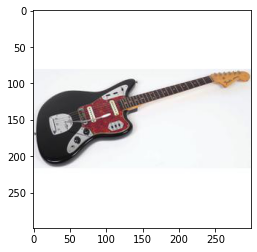

In [ ]:
def show_image(image, label, dataset):
    print("Label: {}".format(label)) 
    plt.imshow(image.permute(1,2,0))
    plt.show()

show_image(*dataset[0], dataset)
#Label: 1

In [ ]:
print(dataset[0]) # tuple(tensor(image), label)
print(dataset[0][0].size())

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), 0)
torch.Size([3, 299, 299])


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [ ]:
net = models.alexnet(progress=True, pretrained=True)
net.classifier[6] = nn.Linear(4096, NUM_CLASSES)
net.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=MOMENTUM)

In [ ]:
for epoch in range(NUM_EPOCHS):

  running_loss = 0.0
  for i, data in enumerate(train_dataloader):

    inputs, labels = data[0].to(device), data[1].to(device)

    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%3 == 1:
      print('[%d, %5d] loss: %.3f' %
             (epoch + 1, i + 1, running_loss / 3))
      running_loss = 0.0

print('Finished Training')


[1,     2] loss: 1.735
[1,     5] loss: 2.414
[1,     8] loss: 2.282
[1,    11] loss: 2.189
[1,    14] loss: 2.087
[1,    17] loss: 2.038
[1,    20] loss: 1.954
[1,    23] loss: 1.870
[2,     2] loss: 1.173
[2,     5] loss: 1.694
[2,     8] loss: 1.693
[2,    11] loss: 1.595
[2,    14] loss: 1.629
[2,    17] loss: 1.523
[2,    20] loss: 1.503
[2,    23] loss: 1.444
[3,     2] loss: 0.922
[3,     5] loss: 1.327
[3,     8] loss: 1.352
[3,    11] loss: 1.292
[3,    14] loss: 1.291
[3,    17] loss: 1.363
[3,    20] loss: 1.289
[3,    23] loss: 1.215
[4,     2] loss: 0.808
[4,     5] loss: 1.241
[4,     8] loss: 1.212
[4,    11] loss: 1.174
[4,    14] loss: 1.089
[4,    17] loss: 1.104
[4,    20] loss: 1.167
[4,    23] loss: 1.112
[5,     2] loss: 0.717
[5,     5] loss: 1.040
[5,     8] loss: 1.096
[5,    11] loss: 1.022
[5,    14] loss: 1.060
[5,    17] loss: 0.980
[5,    20] loss: 1.025
[5,    23] loss: 0.965
[6,     2] loss: 0.673
[6,     5] loss: 0.894
[6,     8] loss: 0.905
[6,    11] 

In [ ]:
# Save the model

PATH = './alexnet.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
# Load the model

net.load_state_dict(torch.load(PATH))
net = net.to(device)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()
  
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %


In [ ]:
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(11):
  try:
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

  except ZeroDivisionError:
    print('Accuracy of %5s : 0%%' % (
        classes[i]))


Accuracy of fender_jaguar :  0 %
Accuracy of fender_jazzmaster : 66 %
Accuracy of fender_mustang : 0%
Accuracy of fender_stratocaster : 100 %
Accuracy of fender_telecaster : 66 %
Accuracy of gibson_ES : 71 %
Accuracy of gibson_Flying_V : 50 %
Accuracy of gibson_SG : 75 %
Accuracy of gibson_explorer : 100 %
Accuracy of gibson_firebird : 100 %
Accuracy of gibson_les_paul : 80 %
